# Handwritten Digit Recognition(MNIST Dataset)

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib widget

np.set_printoptions(precision=2)

2025-05-24 14:16:58.666586: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748076418.688014  104005 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748076418.694129  104005 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748076418.712088  104005 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748076418.712114  104005 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748076418.712116  104005 computation_placer.cc:177] computation placer alr

## Loading & Visualizing Data

In [2]:
# Loading MNIST Dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Checking shape of the loaded datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

1. The training set consists of 60,000 examples where each example is a 28x28 pixel image.
2. The test set consists of 10,000 examples where each example is a 28x28 pixel image.
3. Each pixel has 256 dimming levels, i.e., value of each pixel goes from 0 t0 255 where 0 is black and 255 is white.

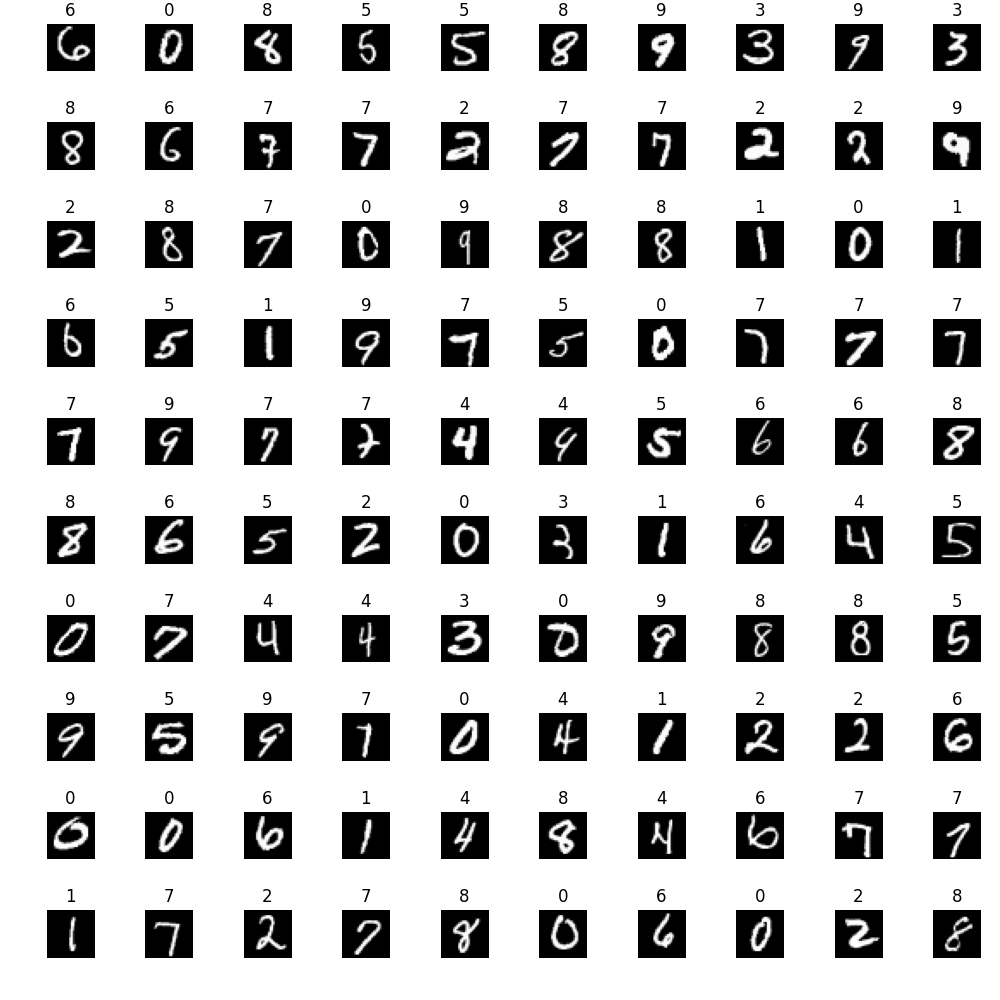

In [4]:
# Visualizing the dataset

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.tight_layout()

for i, ax in enumerate(axes.flatten()):
    random_ind = np.random.randint(x_train.shape[0])
    x_rand = x_train[random_ind]
    ax.imshow(x_rand, cmap='gray')
    ax.set_title(y_train[random_ind])
    ax.axis('off')

## Building a Deep Neural Network Model

Instead of sending a 28x28 matrix as input, it will be better to send an unrolled vector as input.

In [5]:
# Unrolling x

x_train = x_train.reshape(60000, -1, 1)
x_test = x_test.reshape(10000, -1, 1)

print(x_train.shape)
print(x_test.shape)

(60000, 784, 1)
(10000, 784, 1)


In [6]:
# Modeling the neural network

model = Sequential([
    InputLayer((784,)),
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear')
])

# Compiling the model

model.compile(loss = SparseCategoricalCrossentropy(from_logits = True),
             optimizer = Adam(learning_rate=0.001),
             metrics = ['accuracy'])

I0000 00:00:1748076429.415238  104005 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2573 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model

model.fit(x_train, y_train, epochs=40)

Epoch 1/40


I0000 00:00:1748076432.108042  104093 service.cc:152] XLA service 0x73eb200034d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748076432.108066  104093 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-05-24 14:17:12.144329: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748076432.339105  104093 cuda_dnn.cc:529] Loaded cuDNN version 90300


  44/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1406 - loss: 47.6349

I0000 00:00:1748076433.520299  104093 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2191 - loss: 4.8397
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3969 - loss: 1.4531
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5518 - loss: 1.1108
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5878 - loss: 1.0339
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6827 - loss: 0.8358
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6963 - loss: 0.7999
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7041 - loss: 0.7636
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7131 - loss: 0.7402
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7125 - loss: 0.7478
Epoch 10/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7225 - loss: 0.7305
Epoch 11/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7561 - loss: 0.7073
Epoch 12/40
1875/1875 ━━━━━━━━━━━━━━━━━━━

In [9]:
n = np.random.randint(x_train.shape[0])
x_r = x_train[n]
y = y_train[n]

prediction = model.predict(x_r.reshape(-1, 784))

prediction_prob = tf.nn.softmax(prediction)
print(prediction_prob)

y_hat = np.argmax(prediction_prob)
print("Prediction: " + str(y_hat))
print("Actual: " + str(y))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
tf.Tensor(
[[3.10e-10 1.86e-02 9.77e-01 1.97e-03 6.88e-05 1.32e-03 3.12e-05 7.17e-04
  3.25e-04 9.40e-09]], shape=(1, 10), dtype=float32)
Prediction: 2
Actual: 2


In [12]:
model.evaluate(x_test.reshape(10000, -1, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8869 - loss: 0.3830


[0.3467704951763153, 0.8995000123977661]

- Over 93 to 97% accuracy regarding on the starting seed.